In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-2 york\MBAN 6120 - Data Science II\practice_3.csv")
data.shape

(4829, 3)

In [3]:
data.drop(columns=['z'], axis=1, inplace=True)

<Axes: xlabel='x', ylabel='y'>

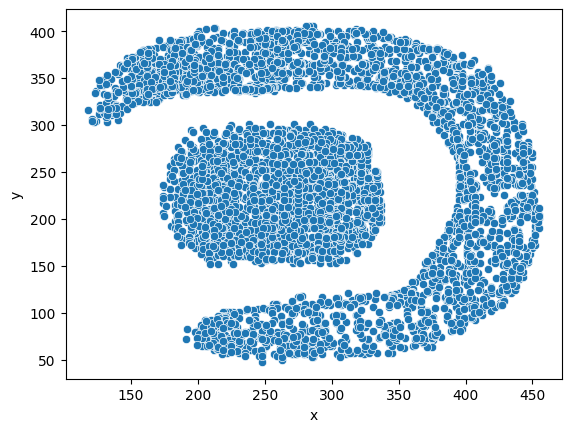

In [4]:
sns.scatterplot(data = data,x='x',y='y')

In [5]:
num_clusters = 2

<Axes: xlabel='x', ylabel='y'>

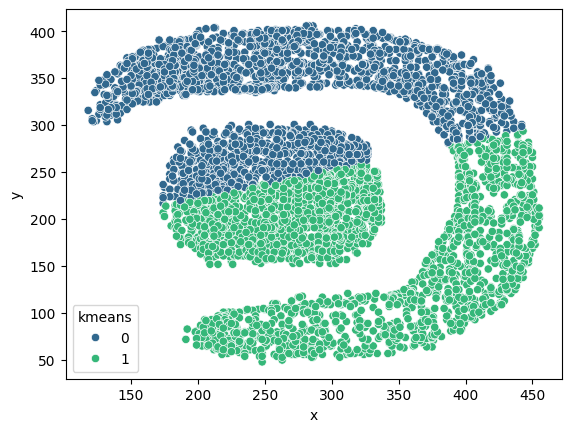

In [6]:
kmeans = KMeans(n_clusters=num_clusters, random_state=123,n_init=1000)
data['kmeans'] = kmeans.fit_predict(data[['x', 'y']])
sns.scatterplot(data=data, x='x', y='y', hue='kmeans', palette='viridis')

<Axes: xlabel='x', ylabel='y'>

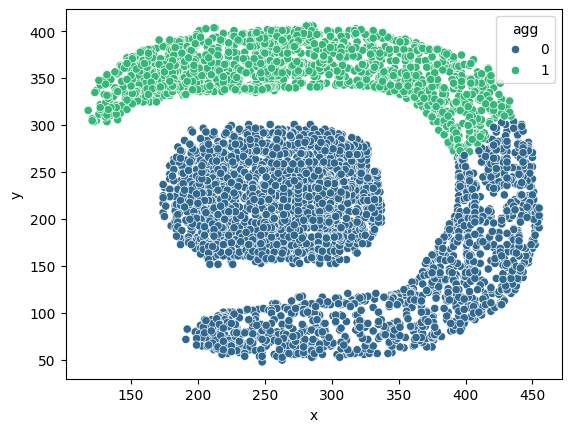

In [7]:
agg = AgglomerativeClustering(n_clusters=num_clusters)
data['agg'] = agg.fit_predict(data[['x', 'y']])
sns.scatterplot(data=data, x='x', y='y', hue='agg', palette='viridis')

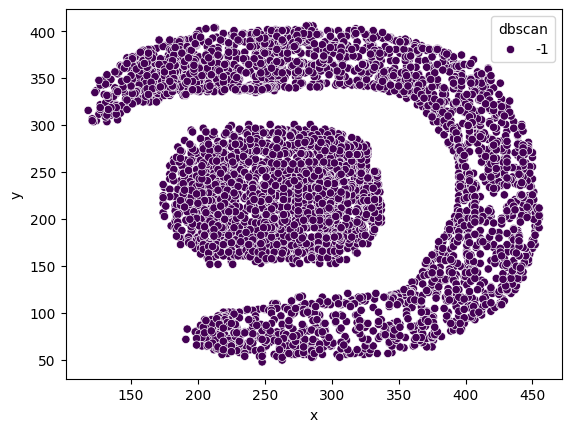

In [8]:
from sklearn.metrics import silhouette_score
dbscan = DBSCAN(eps=0.5, min_samples=10)
data['dbscan'] = dbscan.fit_predict(data[['x', 'y']])
sns.scatterplot(data=data, x='x', y='y', hue='dbscan', palette='viridis')

plt.show()

In [9]:
data = data[['x','y']]

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'eps': [15,20,25,30,35],
    'min_samples': [2,3,5]
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

grid_search = GridSearchCV(estimator=DBSCAN(), param_grid=param_grid, cv=5, scoring=silhouette_scorer)
grid_search.fit(data[['x', 'y']])

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)


c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\srika\AppData\Local\Temp\ipykernel_9976\1364149633.py", line 10, in silhouette_scorer
    return silhouette_score(X, labels)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py",

Best Hyperparameters: {'eps': 15, 'min_samples': 2}
Best Silhouette Score: nan


c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\srika\AppData\Local\Temp\ipykernel_9976\1364149633.py", line 10, in silhouette_scorer
    return silhouette_score(X, labels)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\srika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py",

<Axes: xlabel='x', ylabel='y'>

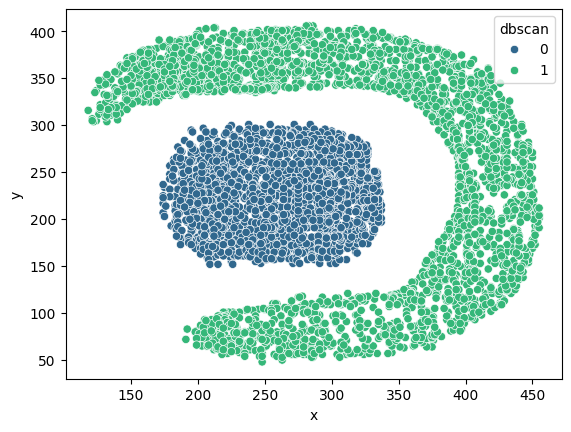

In [11]:
dbscan = DBSCAN(eps=15, min_samples=2)
data['dbscan'] = dbscan.fit_predict(data[['x', 'y']])
sns.scatterplot(data=data, x='x', y='y', hue='dbscan', palette='viridis')